In [1]:
using Flux, Statistics
using Flux: onehotbatch, onecold, @epochs
using Flux.Losses: mse
using MLDatasets
using PyPlot
using Zygote
using DifferentialEquations, LinearAlgebra, ForwardDiff

┌ Warning: The NVIDIA driver on this system only supports up to CUDA 11.1.0.
│ For performance reasons, it is recommended to upgrade to a driver that supports CUDA 11.2 or higher.
└ @ CUDA C:\Users\rafab\.julia\packages\CUDA\9T5Sq\src\initialization.jl:49


### Função a ser aproximada

In [2]:
f(x) = 0.2*sin(4*π*x) + 0.3*exp(-x) + 4.0*x^6 - 3.5*x^5 .+ 1
data_x = reshape(collect(0:0.1:1), 1, :)
data_y = f.(data_x);

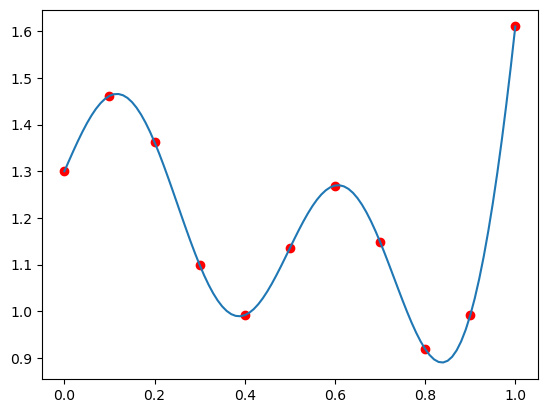

In [3]:
scatter(data_x', data_y', label="dados",color="r")
plot(0:0.01:1, f.(0:0.01:1), label="função");

### Redes com 1 Camada

#### Construção dos modelos

In [4]:
model = Chain(Dense(1, 4, σ),Dense(4, 1))

Chain(
  Dense(1, 4, σ),                       # 8 parameters
  Dense(4, 1),                          # 5 parameters
)                   # Total: 4 arrays, 13 parameters, 308 bytes.

#### Treinamento

In [5]:
n_epochs = 1000

1000

In [6]:
data=[(data_x, data_y)];

In [18]:
loss(x, y) = mse(model(x), y)

loss (generic function with 1 method)

In [52]:
u(t) = ifelse(t < 1,[ps[1],ps[2]],[ps[3],ps[4]])

u (generic function with 1 method)

In [82]:
layer1 = Dense(1, 4, σ)

Dense(1, 4, σ)      # 8 parameters

In [94]:
layer1([1])

4-element Vector{Float32}:
 0.60309213
 0.60159016
 0.43342373
 0.41310236

In [93]:
σ.(layer1.weight*[1] + layer1.bias)

4-element Vector{Float32}:
 0.60309213
 0.60159016
 0.43342373
 0.41310236

In [100]:
f(y,p,t) = σ.(u(t)[1]*y + u(t)[2])
y0 = [1/2]
tspan = (0.0,2.0)
prob = ODEProblem(f,y0,tspan)
sol = solve(prob, Tsit5(), dt=1//10)

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(4),), b has dims (Base.OneTo(1),), mismatch at 1")

In [8]:
model(data_x)

1×11 Matrix{Float64}:
 0.509933  0.516257  0.522575  0.528881  …  0.559991  0.566086  0.572125

In [9]:
loss(data_x, data_y)

0.48826260822301004

In [17]:
ps = Flux.params(model)

Params([Float32[0.32458842; 0.5740427; -0.5494547; 0.9114822], Float32[0.0, 0.0, 0.0, 0.0], Float32[0.26356527 0.56518185 0.22668116 -0.03556256], Float32[0.0]])

In [12]:
train_loss, back = Zygote.pullback(() -> loss(data_x, data_y), ps)

(0.48826260822301004, Zygote.var"#94#95"{Params, typeof(∂(#3)), Zygote.Context}(Params([Float32[0.32458842; 0.5740427; -0.5494547; 0.9114822], Float32[0.0, 0.0, 0.0, 0.0], Float32[0.26356527 0.56518185 0.22668116 -0.03556256], Float32[0.0]]), ∂(#3), Zygote.Context(nothing)))

In [13]:
x = rand(1)

1-element Vector{Float64}:
 0.756868773116752

In [16]:
Zygote.jacobian(x->model(x),x)

([0.06142677860699576],)

In [51]:
Zygote.jacobian((x)->loss(data_x, data_y),x)

([0.0],)

In [10]:
function train(model,opt,loss_func,n_epochs)
    data=[(data_x, data_y)]
    all_losses_var = []
    loss(x, y) = loss_func(m(x), y) # erro quadrático médio
    function cb_(i) # função de call-back, executada a cada iteração
        if rem(i, 2_000) == 0
            @show i, loss(data_x,data_y)
        end
        return nothing
    end
    all_ps = []
    all_losses = []
    ps = Flux.params(m)
    
    for i in 1:n_epochs
        train_loss, back = Zygote.pullback(() -> loss(data...), ps)
        push!(all_losses_var, loss(data_x,data_y))
    end
        
    return all_losses_var
end

train (generic function with 1 method)

In [11]:
all_losses_models,all_losses_re_models,all_losses_re_models2,all_losses_re_models3 = train(models,ADAM(),mse,n_epochs);

Activation Function: σ
Normal
(i, loss(data_x, data_y)) = (2000, 0.15057499327170912)
(i, loss(data_x, data_y)) = (4000, 0.10762527873783784)
(i, loss(data_x, data_y)) = (6000, 0.0943265193408807)
(i, loss(data_x, data_y)) = (8000, 0.08906271505962772)
(i, loss(data_x, data_y)) = (10000, 0.08682825754193164)
(i, loss(data_x, data_y)) = (12000, 0.08586343979851781)
(i, loss(data_x, data_y)) = (14000, 0.0854459914831973)
(i, loss(data_x, data_y)) = (16000, 0.08526557722741929)
(i, loss(data_x, data_y)) = (18000, 0.08518768866688661)
(i, loss(data_x, data_y)) = (20000, 0.08515408135871011)
RE 1
(i, loss(data_x, data_y)) = (2000, 0.09323717518757878)
(i, loss(data_x, data_y)) = (4000, 0.08586041120563309)
(i, loss(data_x, data_y)) = (6000, 0.08519134737102094)
(i, loss(data_x, data_y)) = (8000, 0.08513370616575357)
(i, loss(data_x, data_y)) = (10000, 0.08512898856985252)
RE 2
(i, loss(data_x, data_y)) = (2000, 0.0894813082014654)
(i, loss(data_x, data_y)) = (4000, 0.08527014548981869)
(i, 

#### Resultados

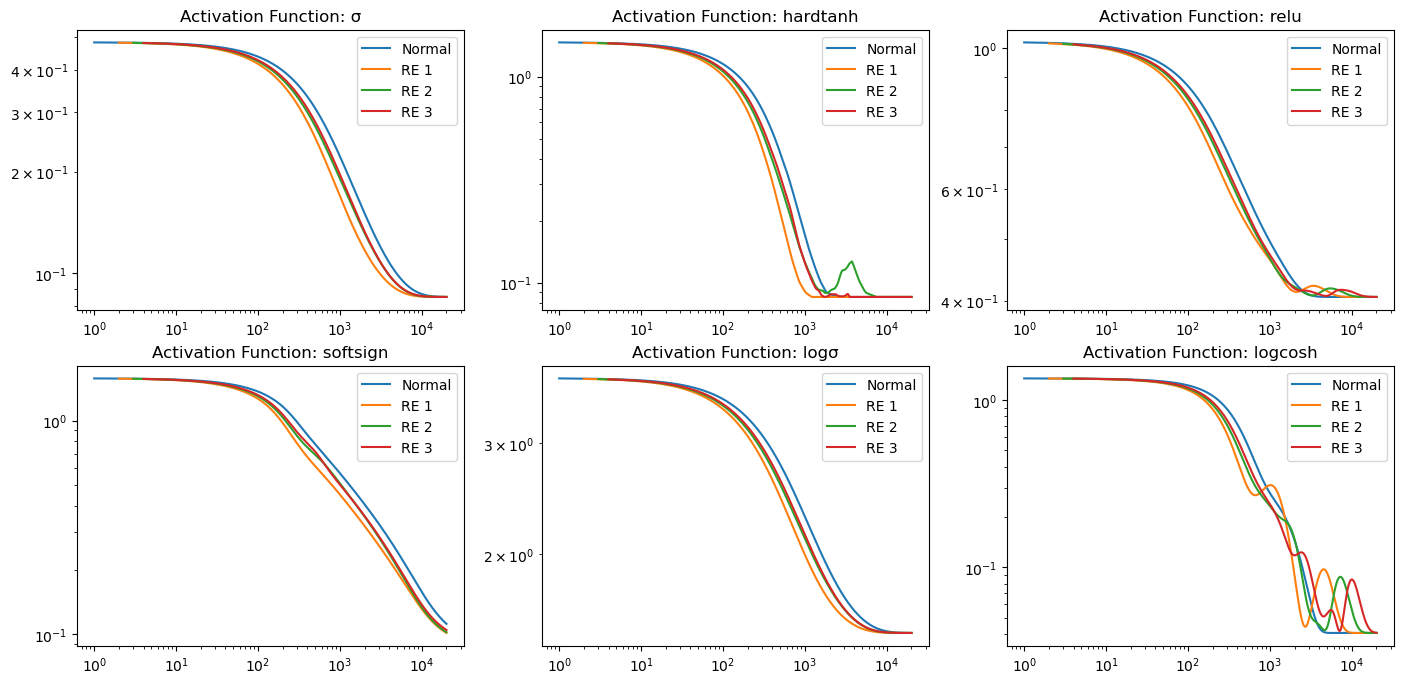

In [12]:
i = 0
fig, axs = plt.subplots(2,3,figsize=(17,8))
for (all_loss,all_loss_re,all_loss_re2,all_loss_re3) in zip(all_losses_models,all_losses_re_models,all_losses_re_models2,all_losses_re_models3)
    m,n = Int64(ceil((i+1)/3)),(i%3)+1
    axs[m,n].set_title("Activation Function: "*string(act_funcs[i+1]))
    axs[m,n].loglog(1:1:n_epochs,all_loss,label="Normal")
    axs[m,n].loglog(2:2:n_epochs,all_loss_re,label="RE 1")
    axs[m,n].loglog(3:3:n_epochs,all_loss_re2,label="RE 2")
    axs[m,n].loglog(4:4:n_epochs,all_loss_re3,label="RE 3")
    axs[m,n].legend()
    i +=1
end

In [13]:
fig.savefig("Function_approximation_re_1_layer.pdf")

### Redes com 2 Camadas

#### Construção dos modelos

In [14]:
models = Chain.(Dense.(1,4, act_funcs), Dense.(4,1))

6-element Vector{Chain}:
 Chain(Dense(1, 4, σ), Dense(4, 1))
 Chain(Dense(1, 4, hardtanh), Dense(4, 1))
 Chain(Dense(1, 4, relu), Dense(4, 1))
 Chain(Dense(1, 4, softsign), Dense(4, 1))
 Chain(Dense(1, 4, logσ), Dense(4, 1))
 Chain(Dense(1, 4, logcosh), Dense(4, 1))

#### Treinamento

In [15]:
all_losses_models,all_losses_re_models,all_losses_re_models2,all_losses_re_models3 = train(models,ADAM(),mse,n_epochs);

Activation Function: σ
Normal
(i, loss(data_x, data_y)) = (2000, 0.0406759928681655)
(i, loss(data_x, data_y)) = (4000, 0.04061381917698173)
(i, loss(data_x, data_y)) = (6000, 0.04055800113290833)
(i, loss(data_x, data_y)) = (8000, 0.0404939609664716)
(i, loss(data_x, data_y)) = (10000, 0.03667839132107831)
(i, loss(data_x, data_y)) = (12000, 0.026620863844405453)
(i, loss(data_x, data_y)) = (14000, 0.02304323660879868)
(i, loss(data_x, data_y)) = (16000, 0.01975329778001371)
(i, loss(data_x, data_y)) = (18000, 0.012378224852604286)
(i, loss(data_x, data_y)) = (20000, 0.006921310772895901)
RE 1
(i, loss(data_x, data_y)) = (2000, 0.040608937739625796)
(i, loss(data_x, data_y)) = (4000, 0.0404650357299939)
(i, loss(data_x, data_y)) = (6000, 0.3130426476634374)
(i, loss(data_x, data_y)) = (8000, 0.9006838327519553)
(i, loss(data_x, data_y)) = (10000, 1.1019309319079988)
RE 2
(i, loss(data_x, data_y)) = (2000, 0.040535633398429236)
(i, loss(data_x, data_y)) = (4000, 1.0774758817396302)
(i,

#### Resultados

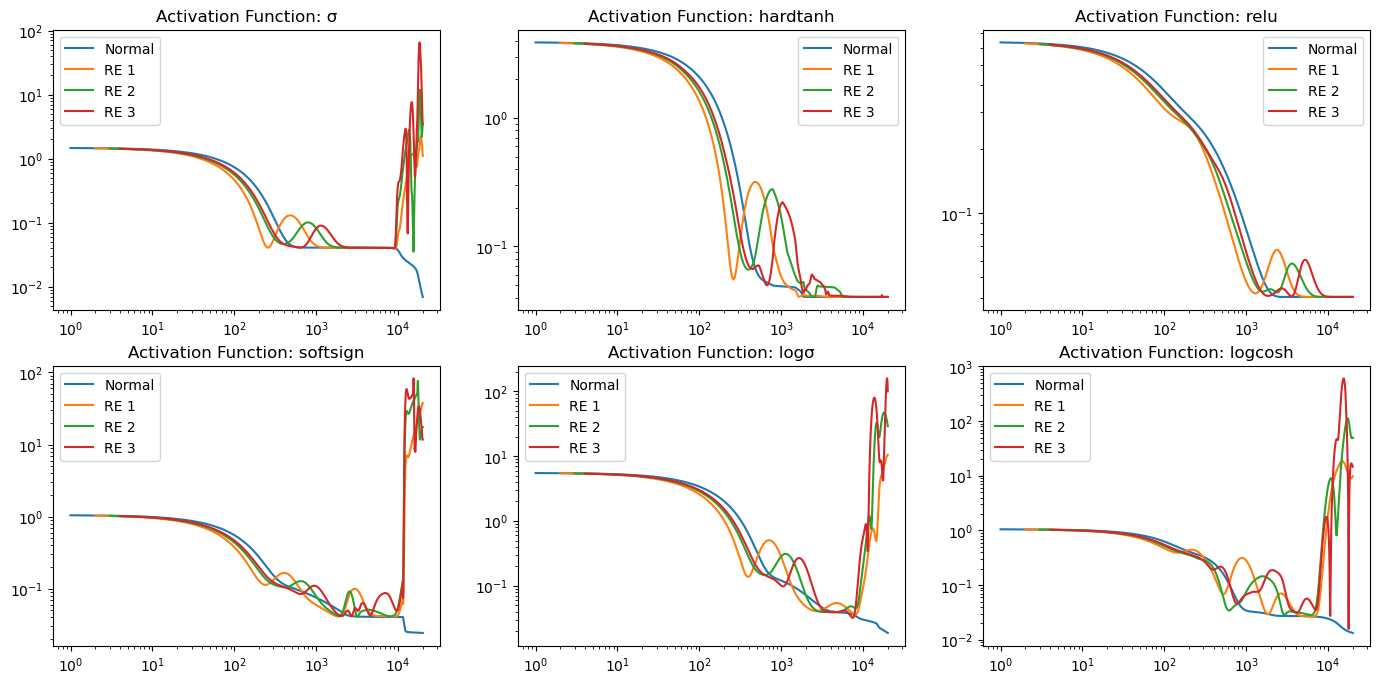

In [16]:
i = 0
fig, axs = plt.subplots(2,3,figsize=(17,8))
for (all_loss,all_loss_re,all_loss_re2,all_loss_re3) in zip(all_losses_models,all_losses_re_models,all_losses_re_models2,all_losses_re_models3)
    m,n = Int64(ceil((i+1)/3)),(i%3)+1
    #@show models[i+1][1].σ,i+1,m,n
    axs[m,n].set_title("Activation Function: "*string(act_funcs[i+1]))
    #axs[m,n].yaxis.set_major_formatter(ticker.PercentFormatter())
    axs[m,n].loglog(1:1:n_epochs,all_loss,label="Normal")
    axs[m,n].loglog(2:2:n_epochs,all_loss_re,label="RE 1")
    axs[m,n].loglog(3:3:n_epochs,all_loss_re2,label="RE 2")
    axs[m,n].loglog(4:4:n_epochs,all_loss_re3,label="RE 3")
    axs[m,n].legend()
    i +=1
end

In [17]:
fig.savefig("Function_approximation_re_2_layers.pdf")